In [26]:
# 참고

# https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning
# https://yganalyst.github.io/data_handling/Pd_11/
# https://haloaround.tistory.com/260
# https://stml.tistory.com/25
# https://riptutorial.com/ko/pandas/example/5621/dataframe%EC%9D%98-%EC%97%B4-%EC%82%AD%EC%A0%9C
# https://kanoki.org/2019/03/23/pandas-rename-and-reorder-columns/
# https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
# https://m.blog.naver.com/PostList.nhn?blogId=youji4ever
# https://m.blog.naver.com/youji4ever/221712578078


In [3]:
# df 가져오기

import numpy as np
import pandas as pd
naver = pd.read_csv('./data/naver.csv')
bluer = pd.read_csv('./data/bluer.csv')
mango = pd.read_csv('./data/mango.csv')
dining = pd.read_csv('./data/dining.csv')
menu = pd.read_csv('./data/menu.csv')

In [4]:
# 고유값인 'id'로 중복값 제거

naver = naver.drop_duplicates(['id'])
bluer = bluer.drop_duplicates(['id'])
dining = dining.drop_duplicates(['id'])

In [5]:
# 필요 없는 컬럼 제거

# print('naver: ',list(naver.columns))
# print('bluer: ',list(bluer.columns))
# print('mango: ',list(mango.columns))
# print('dining: ',list(dining.columns))
# print('menu: ',list(menu.columns))

naver.drop(naver.columns[:4], axis='columns', inplace=True)
naver.drop(['reviewcount'], axis='columns', inplace=True)
bluer.drop(bluer.columns[:3], axis='columns', inplace=True)
mango.drop(['review_count'], axis='columns', inplace=True)
dining.drop(dining.columns[0], axis='columns', inplace=True)
dining.drop(['id', 'review_count', 'star', 'zzim'], axis='columns', inplace=True)
menu.drop(['link'], axis='columns', inplace=True)

# print('naver: ',list(naver.columns))
# print('bluer: ',list(bluer.columns))
# print('mango: ',list(mango.columns))
# print('dining: ',list(dining.columns))
# print('menu: ',list(menu.columns))

In [6]:
# 컬럼명 통합

naver = naver.rename({'rating':'n_rating','thumbnail':'img'}, axis=1)
bluer = bluer.rename({'ribbonType':'b_rating'}, axis=1)
mango = mango.rename({'cusine_code':'category', 'rating':'mg_rating', 'thumbnail':'img'}, axis=1)
dining = dining.rename({'address':'addr', 'score':'d_rating'}, axis=1)
menu = menu.rename({'address':'addr', 'rating':'mn_rating', 'rest_type':'category'}, axis=1)

In [7]:
# df 합치기

df = naver.append([bluer, mango, dining, menu])
df['si'] = ''
df['gu'] = ''
df = df[['name', 'tel', 'addr', 'si', 'gu', 'dong', 'category', 'menu', 'bizhour', 'n_rating', 'b_rating', 'mg_rating', 'd_rating', 'mn_rating',
'context', 'microreview', 'priceRange', 'lng', 'lat', 'img']]
df.reset_index(drop=True, inplace=True)

In [8]:
# si, gu 컬럼 채우기

edit = df['addr'].str.split(' ', expand=True)
df['si'] = edit[0]
df['gu'] = edit[1]
df['dong'] = edit[2]

In [9]:
# si, gu, dong 전처리

seoul = df.si.str.startswith('서울', na=False)
df = df[seoul]
df['si'] = '서울특별시'

In [10]:
df['edit'] = df['dong'] + df['tel']

In [11]:
df['edit']

0          당주동02-310-9636
1        체부동010-8706-3392
2          내자동02-735-2608
3        체부동010-9160-4482
4          당주동02-730-7090
               ...       
47759      성북동02-762-3342
47760      논현동02-544-6336
47761      청담동02-544-9234
47766      서교동02-334-6570
47772      합정동02-332-8333
Name: edit, Length: 39162, dtype: object

In [12]:
df.to_excel('./df.xlsx')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39162 entries, 0 to 47772
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         39162 non-null  object 
 1   tel          38387 non-null  object 
 2   addr         39162 non-null  object 
 3   si           39162 non-null  object 
 4   gu           39162 non-null  object 
 5   dong         39160 non-null  object 
 6   category     28068 non-null  object 
 7   menu         23316 non-null  object 
 8   bizhour      10232 non-null  object 
 9   n_rating     10343 non-null  object 
 10  b_rating     2018 non-null   object 
 11  mg_rating    15414 non-null  float64
 12  d_rating     11093 non-null  object 
 13  mn_rating    294 non-null    float64
 14  context      10343 non-null  object 
 15  microreview  10343 non-null  object 
 16  priceRange   2018 non-null   object 
 17  lng          28069 non-null  float64
 18  lat          28069 non-null  float64
 19  img 

#### mango.cusine_code
- 1: 한식
- 2: 중식
- 3: 일식
- 4: 양식
- 5: 동남아
- 6: 뷔페
- 7: 카페/디저트
- 8: 바

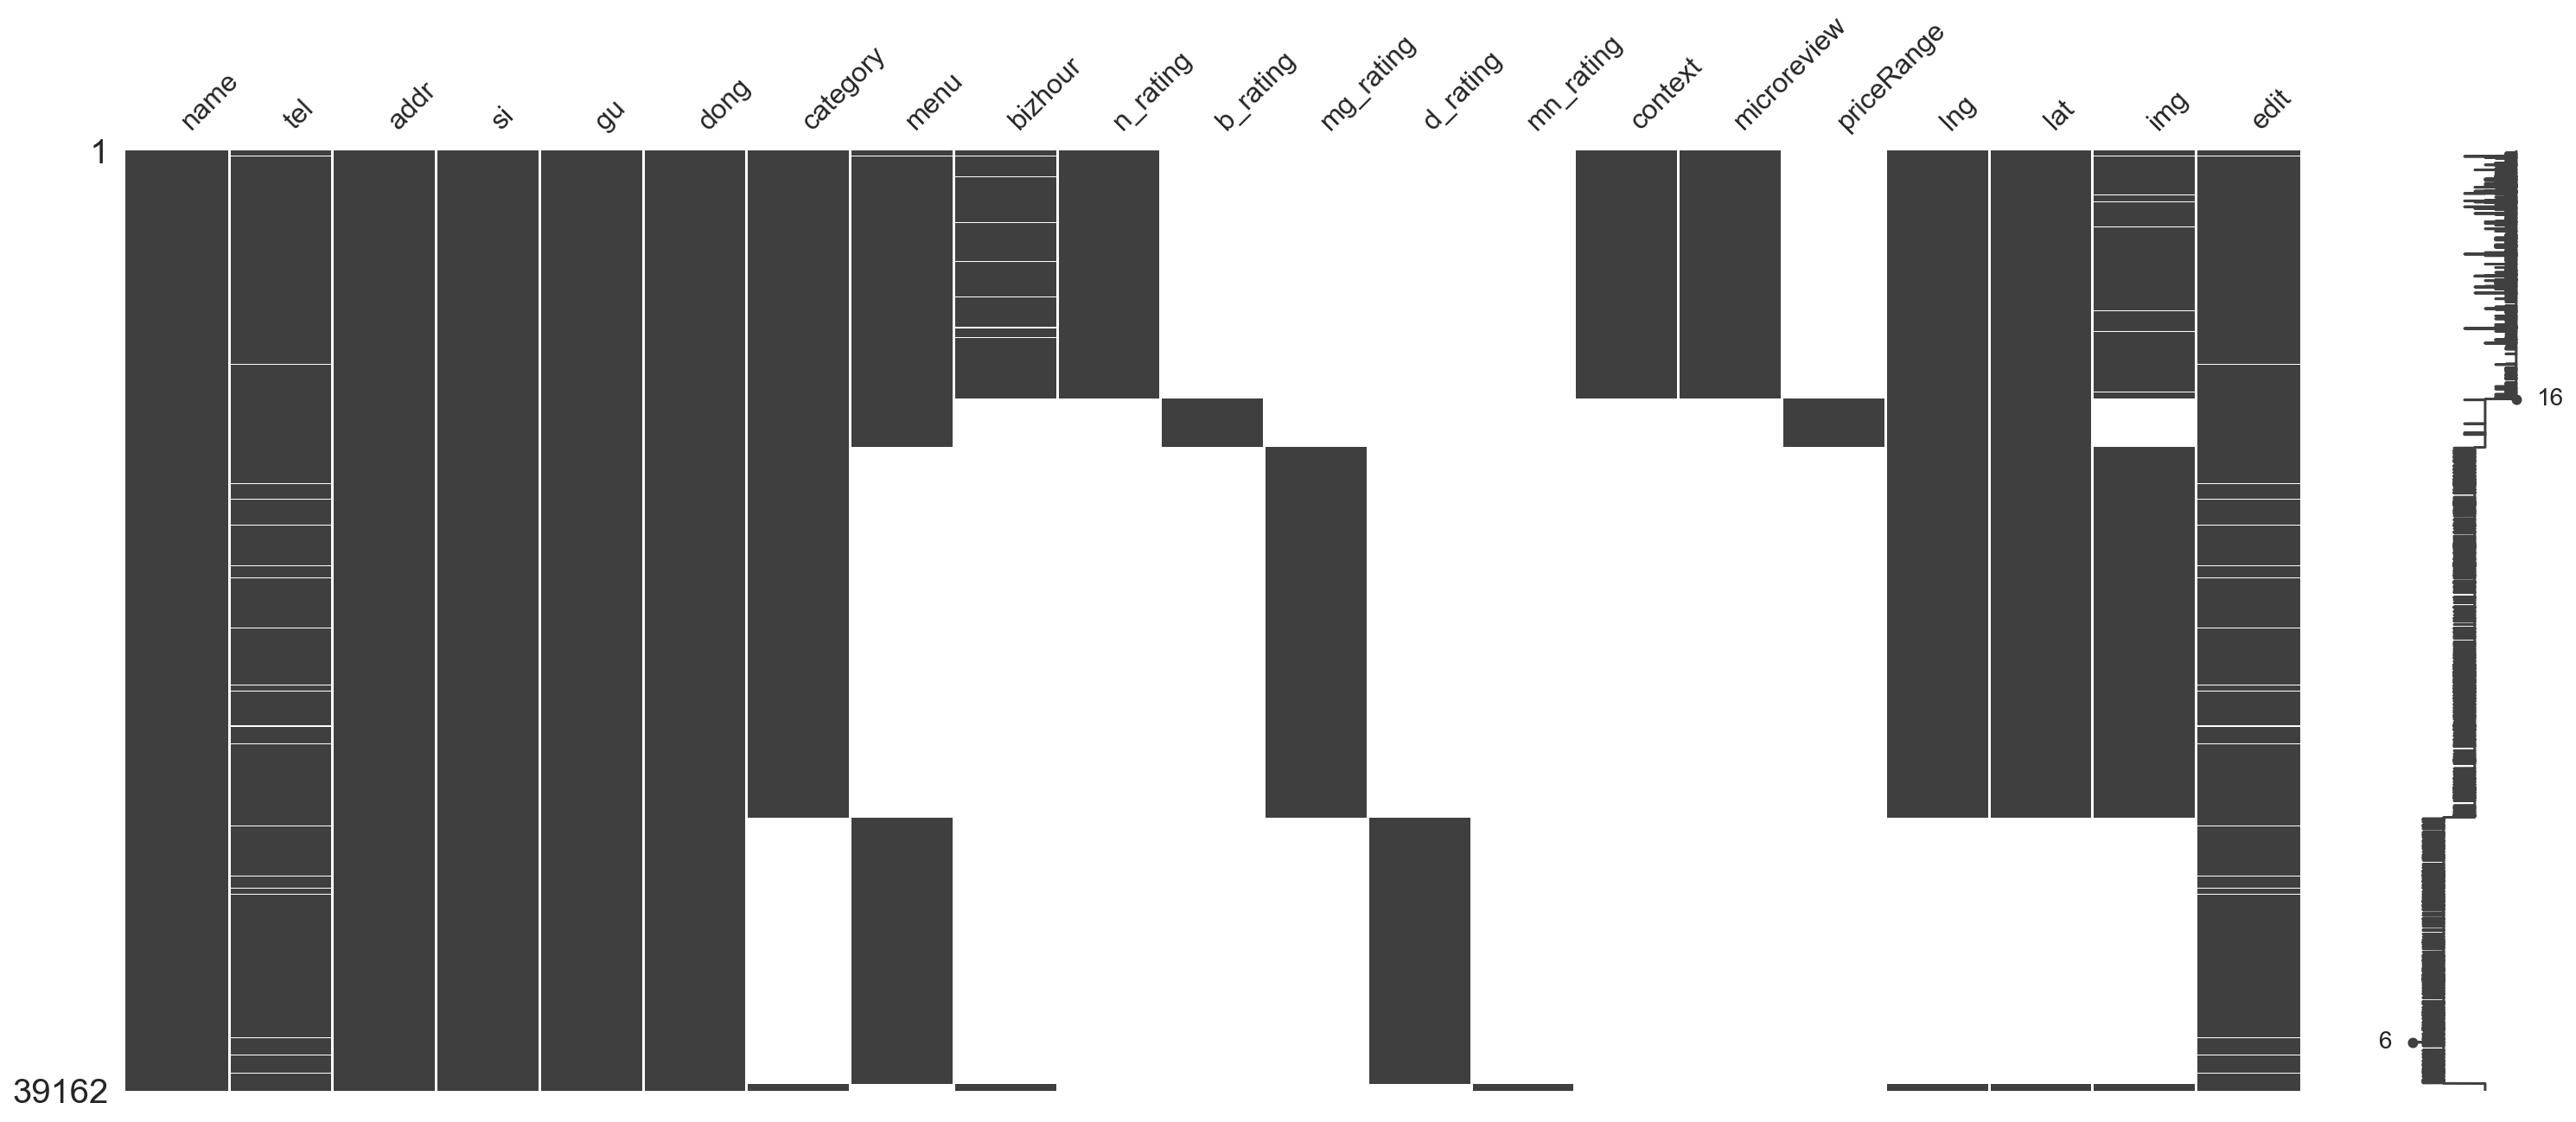

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.heatmap(df.isnull(), cbar=False)
import missingno as msno
msno.matrix(df)

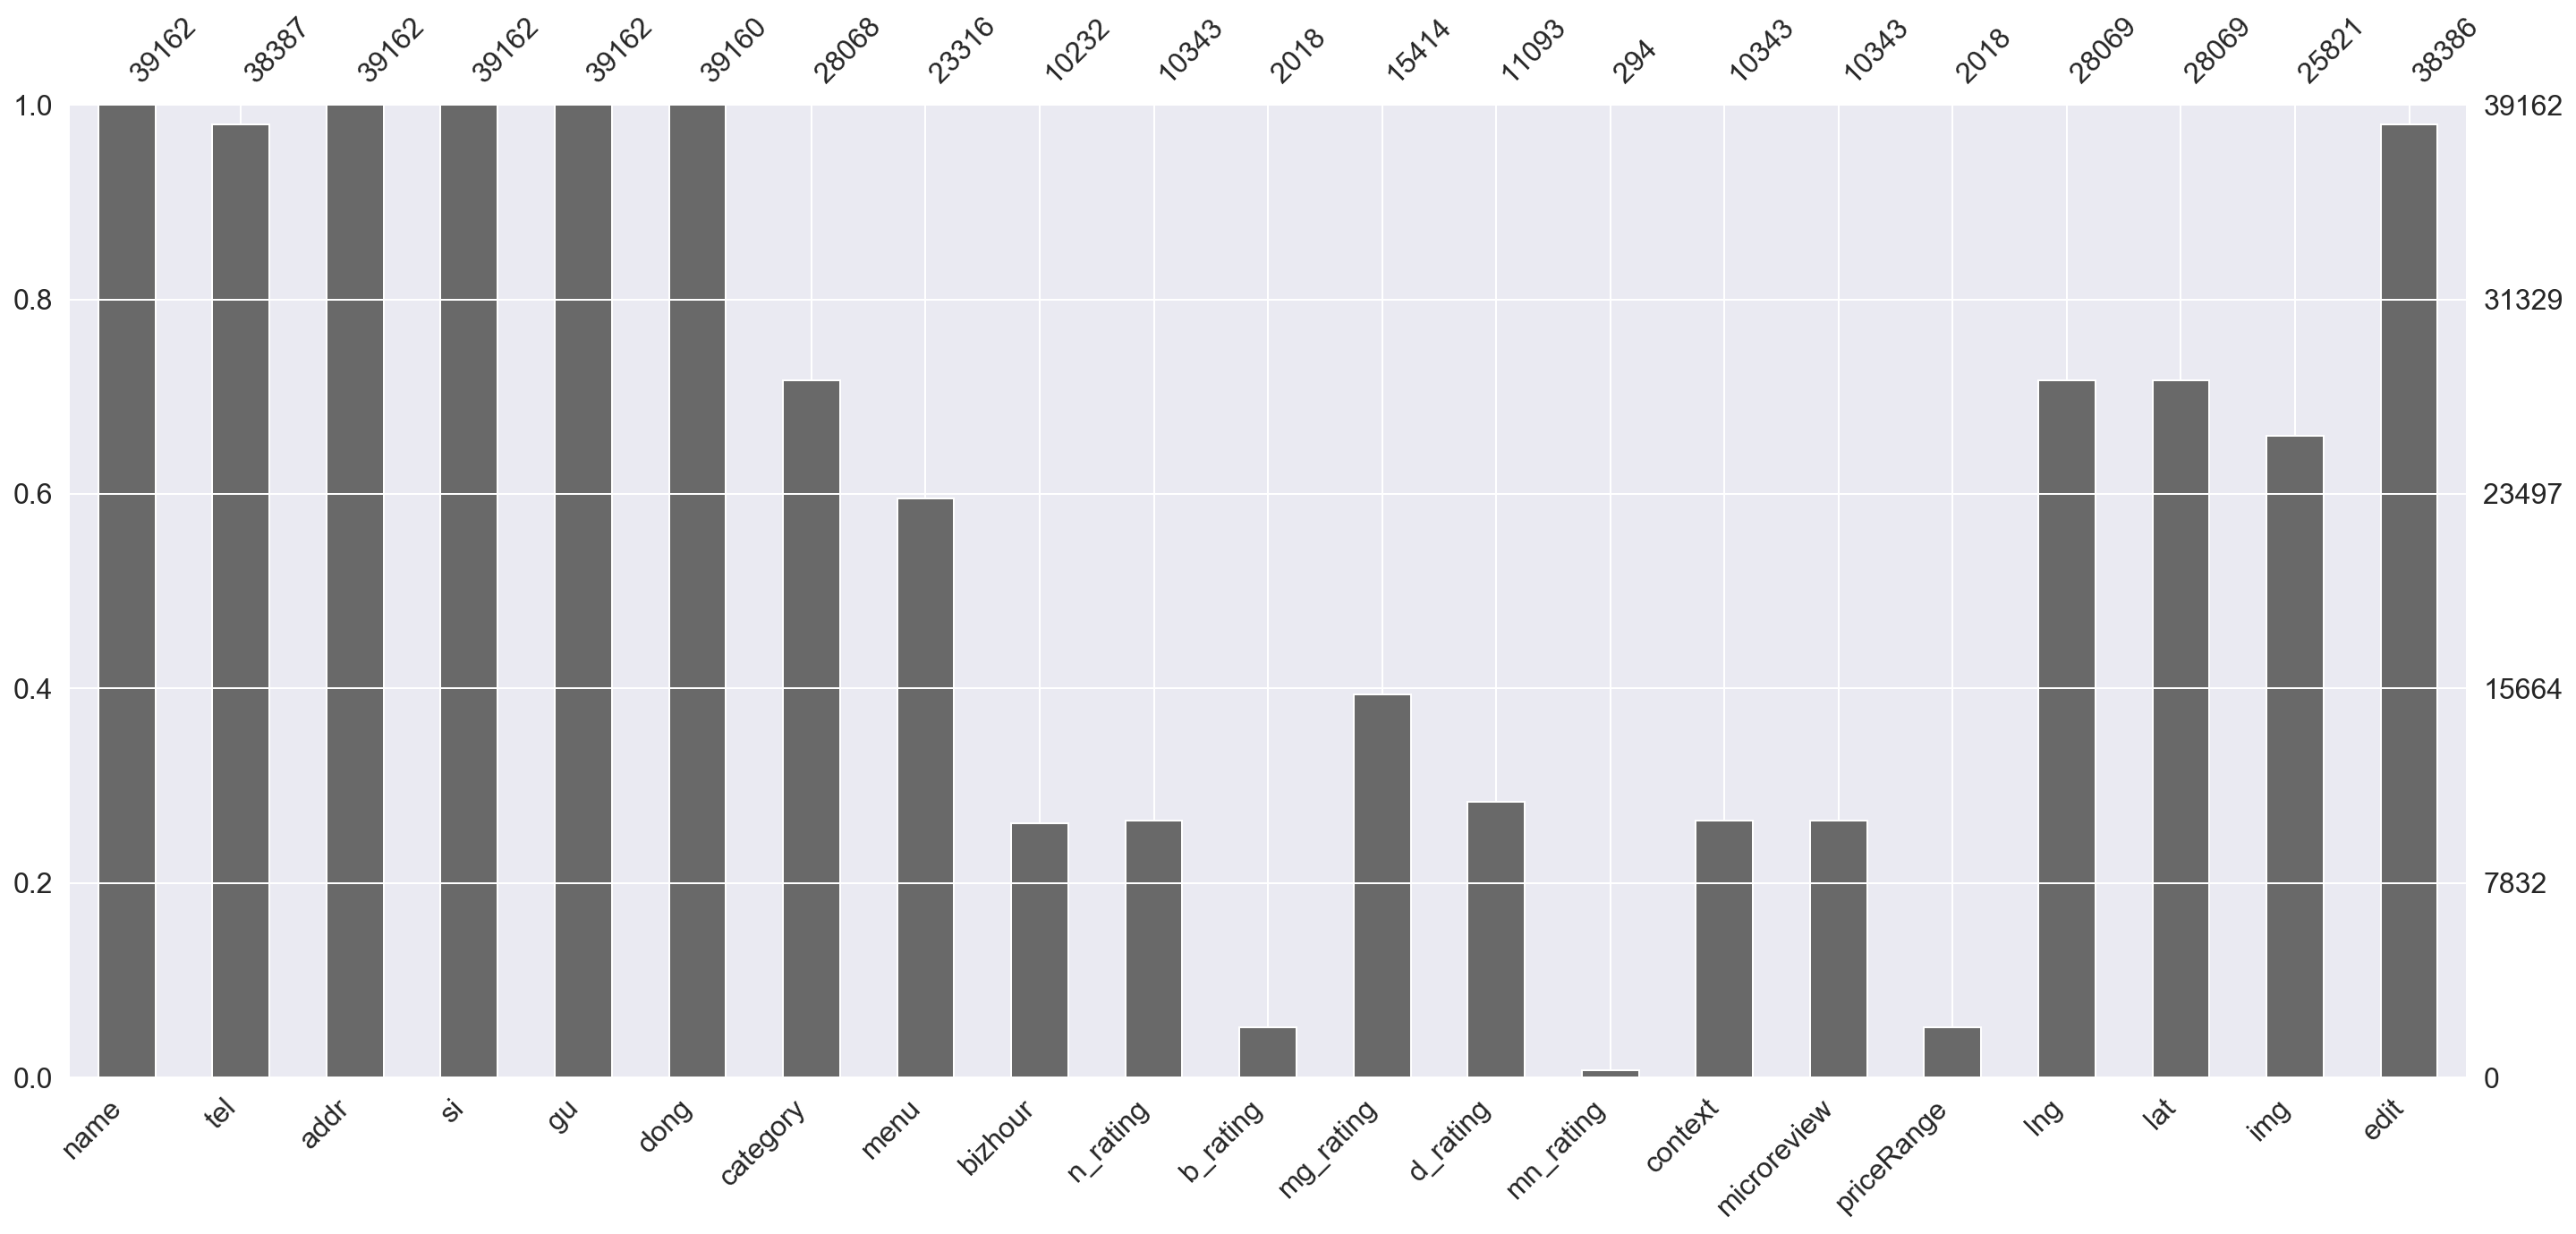

In [25]:
msno.bar(df)

In [27]:
# https://m.blog.naver.com/PostList.nhn?blogId=youji4ever
# https://m.blog.naver.com/youji4ever/221712578078
# https://blog.naver.com/youji4ever/221791455668

In [28]:
df.category

0                 ['한식', '소고기구이']
1        ['이탈리아음식', '스파게티,파스타전문']
2                 ['한식', '족발,보쌈']
3               ['음식점', '카페,디저트']
4                   ['일식', '일식당']
                   ...           
47759                          한식
47760                          중식
47761                          양식
47766                    카페/주점-카페
47772                       양식-기타
Name: category, Length: 39162, dtype: object

In [ ]:
우선 동 + 전화번호로 중복가게 없애고

In [ ]:
category = 1~8로 정리하기
null값은 diningcode인데, menu에서 긁어오면 될듯

다이닝코드는 진지하게 버릴지 말지 고민해야할듯